In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm, utils, preprocessing
from sklearn.datasets import load_boston as boston

In [2]:
df = pd.DataFrame(boston().data, columns=boston().feature_names)
df['MEDV'] = boston().target
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [3]:
# Матрица корреляций

correlation = pd.DataFrame(df.corr()['MEDV'])

correlation_weak = correlation[(abs(correlation['MEDV']) > 0.2) & (abs(correlation['MEDV']) <= 0.5)]
correlation_weak = correlation_weak.rename(columns={'MEDV': 'Слабая корреляция'})

correlation_average = correlation[(abs(correlation['MEDV']) > 0.5) & (abs(correlation['MEDV']) <= 0.7)]
correlation_average = correlation_average.rename(columns={'MEDV': 'Средняя корреляция'})

correlation_strong = correlation[(abs(correlation['MEDV']) > 0.7) & (abs(correlation['MEDV']) <= 0.9)]
correlation_strong = correlation_strong.rename(columns={'MEDV': 'Сильная корреляция'})

correlation_very_strong = correlation[(abs(correlation['MEDV']) > 0.9) & (abs(correlation['MEDV']) <= 1)]
correlation_very_strong = correlation_very_strong.rename(columns={'MEDV': 'Очень сильная корреляция'})

[correlation_weak, correlation_average, correlation_strong, correlation_very_strong]

[       Слабая корреляция
 CRIM           -0.388305
 ZN              0.360445
 INDUS          -0.483725
 NOX            -0.427321
 AGE            -0.376955
 DIS             0.249929
 RAD            -0.381626
 TAX            -0.468536
 B               0.333461,
          Средняя корреляция
 RM                 0.695360
 PTRATIO           -0.507787,
        Сильная корреляция
 LSTAT           -0.737663,
       Очень сильная корреляция
 MEDV                       1.0]

In [4]:
# Сплитим выборку
x = df[['LSTAT']].values
y = df['MEDV'].values
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.3, random_state=40)

In [5]:
# Линейная регрессия
clf = LinearRegression()
clf.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
mean_squared_error(y_test, clf.predict(x_test)), r2_score(y_test, clf.predict(x_test))

(54.99058627268516, 0.5189381794053393)

Для линейной модели, нормальный результат

In [7]:
# Полиномиальная регрессия
poly_quad = PolynomialFeatures(degree=2)
poly_cub = PolynomialFeatures(degree=3)

x_quad = poly_quad.fit_transform(x_train)
x_cub = poly_cub.fit_transform(x_train)

x_quad_transform = poly_quad.fit_transform(x_test)
x_cub_transform = poly_cub.fit_transform(x_test)

poly_cub.fit(x_train, y_train)
poly_quad.fit(x_train, y_train)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [8]:
# Фитим
x_fit = np.arange(x_train.min(), x_train.max())[:, np.newaxis]

In [9]:
regr = clf.fit(x_train, y_train)
y_lin_fit = regr.predict(x_fit)
linear_r2 = r2_score(y_test, regr.predict(x_test))

regr = clf.fit(x_quad, y_train)
y_quad_fit = regr.predict(poly_quad.fit_transform(x_fit))
quadratic_r2 = r2_score(y_test, regr.predict(x_quad_transform))

regr = clf.fit(x_cub, y_train)
y_cub_fit = regr.predict(poly_cub.fit_transform(x_fit))
cubic_r2 = r2_score(y_test, regr.predict(x_cub_transform))

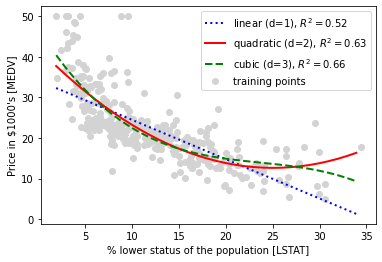

In [10]:
# Графики результатов
plt.scatter(x_train, y_train, label='training points', color='lightgray')

plt.plot(x_fit, y_lin_fit, 
         label='linear (d=1), $R^2={:.2f}$'.format(linear_r2), 
         color='blue', 
         lw=2, 
         linestyle=':')

plt.plot(x_fit, y_quad_fit, 
         label='quadratic (d=2), $R^2={:.2f}$'.format(quadratic_r2),
         color='red', 
         lw=2,
         linestyle='-')

plt.plot(x_fit, y_cub_fit, 
         label='cubic (d=3), $R^2={:.2f}$'.format(cubic_r2),
         color='green', 
         lw=2, 
         linestyle='--')

plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.legend(loc='upper right')

Данные расположены полиномиально, поэтому кубический полином самый точный - качество улучшено

In [11]:
# Пробуем дерево решений
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [12]:
regr = dtr.fit(x_train, y_train)

y_dtr_fit = regr.predict(x_fit)
dtr_r2 = r2_score(y_test, regr.predict(x_test))

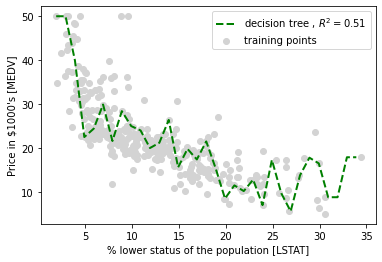

In [13]:
plt.scatter(x_train, y_train, label='training points', color='lightgray')
plt.plot(x_fit, y_dtr_fit, 
         label='decision tree , $R^2={:.2f}$'.format(dtr_r2),
         color='green', 
         lw=2, 
         linestyle='--')

plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.legend(loc='upper right')

Деревья плохо решают эту задачу, что видно

In [14]:
# Пробуем опорные вектора
clf = svm.SVR()

regr = clf.fit(x_train, y_train)
y_clf_fit = regr.predict(x_fit)
clf_r2 = r2_score(y_test, regr.predict(x_test))

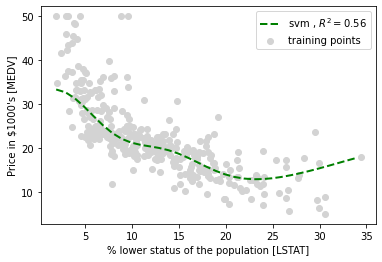

In [15]:
plt.scatter(x_train, y_train, label='training points', color='lightgray')
plt.plot(x_fit, y_clf_fit, 
         label='svm , $R^2={:.2f}$'.format(clf_r2),
         color='green', 
         lw=2, 
         linestyle='--')

plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.legend(loc='upper right')

Опорные вектора дают слабый результат, в сравнении с кубическим полиномом

In [16]:
# Можем добавить следующие по степени корреляции признаки после наилучшего
X = df[['LSTAT', 'RM']].values
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.3, random_state=40)
X_fit = np.arange(x_train.min(), x_train.max())[:, np.newaxis]

In [17]:
regr = clf.fit(x_train, y_train)
y_clf_fit = regr.predict(x_test)
clf_r2 = r2_score(y_test, regr.predict(x_test))
clf_r2

0.5574876149136923

Если добавить третий признак, то качество падает. Вообще, лучше использовать признаки с наилучшей корреляцией